In [7]:
import pandas as pd
import numpy as np

In [11]:
data = pd.read_csv('insurance.csv')

In [12]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
pd.set_option('display.max_rows', 100)

In [17]:
print(data.shape)

(1338, 7)


In [22]:
print(data.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [24]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [26]:
data['charges'] = data['charges'].astype('int64')

In [29]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13269.928999
std,14.049960,6.098187,1.205493,12110.012755
min,18.000000,15.960000,0.000000,1121.000000
25%,27.000000,26.296250,0.000000,4740.000000
50%,39.000000,30.400000,1.000000,9381.500000
75%,51.000000,34.693750,2.000000,16639.250000
max,64.000000,53.130000,5.000000,63770.000000


In [27]:
data.describe(include=['object', 'bool'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [28]:
data['charges'].value_counts()

7160     2
13224    2
1137     2
2203     2
13143    2
        ..
16420    1
8891     1
37607    1
9549     1
13831    1
Name: charges, Length: 1284, dtype: int64

In [30]:
data['bmi'].value_counts(normalize=True)

32.300    0.009716
28.310    0.006726
31.350    0.005979
30.800    0.005979
30.875    0.005979
            ...   
20.100    0.000747
29.545    0.000747
37.900    0.000747
25.520    0.000747
24.090    0.000747
Name: bmi, Length: 548, dtype: float64

# SORT

In [34]:
data.sort_values(by='region',ascending=False).head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884
304,57,female,38.0,2,no,southwest,12646
861,38,female,28.0,3,no,southwest,7151
864,51,male,25.4,0,no,southwest,8782
865,40,male,29.9,2,no,southwest,6600


In [35]:
data.sort_values(by=['sex', 'children'], ascending=[True, False]).head()

,age,sex,bmi,children,smoker,region,charges
32,19,female,28.600,5,no,southwest,4687
166,20,female,37.000,5,no,southwest,4830
438,52,female,46.750,5,no,southeast,12592
568,49,female,31.900,5,no,southwest,11552
937,39,female,24.225,5,no,northwest,8965


# Indexing and Retrieving Data

We will use this to answer the question: what is the average age of the users in our data frame?

In [48]:
data['age'].mean()

39.20702541106129

We will use this to answer the question: what are the average values of numerical signs among users with children?

In [57]:
data[data['children'] == 1].mean()

age            39.453704
bmi            30.623148
children        1.000000
charges     12730.706790
dtype: float64

Having combined the previous two types of indexation, we will answer the question: how much is the average age of users and the number of their children?

In [56]:
data[data['children'] == 1]['age'].mean()

39.4537037037037

In [58]:
data.loc[0:5, 'age':'bmi']

,age,sex,bmi
0,19,female,27.900
1,18,male,33.770
2,28,male,33.000
3,33,male,22.705
4,32,male,28.880
5,31,female,25.740


In [59]:
data.iloc[0:5, 0:3]

,age,sex,bmi
0,19,female,27.900
1,18,male,33.770
2,28,male,33.000
3,33,male,22.705
4,32,male,28.880


In [60]:
data[-1:]

,age,sex,bmi,children,smoker,region,charges
1337,61,female,29.07,0,yes,northwest,29141


# Applying Functions to Cells, Columns, and Rows

### Applying a function to each column: apply

In [61]:
data.apply(np.max) 

age                64
sex              male
bmi             53.13
children            5
smoker            yes
region      southwest
charges         63770
dtype: object

In [65]:
d = {'no' : False, 'yes' : True}
data['smoker'] = data['smoker'].map(d)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,NaN,southwest,16884
1,18,male,33.770,1,NaN,southeast,1725
2,28,male,33.000,3,NaN,southeast,4449
3,33,male,22.705,0,NaN,northwest,21984
4,32,male,28.880,0,NaN,northwest,3866


In [66]:
data = data.replace({'smoker': d})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,NaN,southwest,16884
1,18,male,33.770,1,NaN,southeast,1725
2,28,male,33.000,3,NaN,southeast,4449
3,33,male,22.705,0,NaN,northwest,21984
4,32,male,28.880,0,NaN,northwest,3866


# Data grouping

In [70]:
data.groupby(by=grouping_columns)[sex].function()

NameError: name 'grouping_columns' is not defined

In [75]:
columns_to_show = ['sex', 'age', 'region']
data.groupby(['children'])[columns_to_show].describe(percentiles=[])

age                                        
          count       mean        std   min   50%   max
children                                               
0         574.0  38.444251  16.436228  18.0  36.0  64.0
1         324.0  39.453704  12.067445  18.0  40.0  64.0
2         240.0  39.445833  11.588715  18.0  40.0  64.0
3         157.0  41.566879  12.206174  18.0  41.0  64.0
4          25.0  39.000000  12.138094  18.0  39.0  61.0
5          18.0  35.611111  10.123583  19.0  39.0  52.0

In [76]:
columns_to_show = ['sex', 'age', 'region']
data.groupby(['children'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

age                     
               mean        std amin amax
children                                
0         38.444251  16.436228   18   64
1         39.453704  12.067445   18   64
2         39.445833  11.588715   18   64
3         41.566879  12.206174   18   64
4         39.000000  12.138094   18   61
5         35.611111  10.123583   19   52

# Summary tables

In [77]:
pd.crosstab(data['sex'], data['children'])

children,0,1,2,3,4,5
sex,,,,,,
female,289,158,119,77,11,8
male,285,166,121,80,14,10


In [78]:
pd.crosstab(data['sex'], data['children'], normalize=True)

children,0,1,2,3,4,5
sex,,,,,,
female,0.215994,0.118087,0.088939,0.057549,0.008221,0.005979
male,0.213004,0.124066,0.090433,0.059791,0.010463,0.007474


Let's see the average charges for men and women

In [79]:
data.pivot_table(['charges'], 
['sex'], aggfunc='mean').head(10)

,charges
sex,
female,12569.069486
male,13956.273669


### The first attempts to predict outflow

# У МЕНЯ ТУТ НЕ ВЫШЕЛ ГРАФИК :( ПОДСКАЖИТЕ, КАК ПРАВИЛЬНО

In [91]:
pd.crosstab(data['age'], data['sex'], margins=True)

sex,female,male,All
age,,,
18,33,36,69
19,33,35,68
20,14,15,29
21,13,15,28
22,13,15,28
23,14,14,28
24,14,14,28
25,13,15,28
26,13,15,28


# Demonstration of the basic methods of Seaborn and Plotly

In [102]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [103]:
data = pd.read_csv('insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [108]:
data = data.dropna()
print(data.shape)

(1338, 7)


In [109]:
useful_cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
data[useful_cols].head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Build a graph of charges versus age

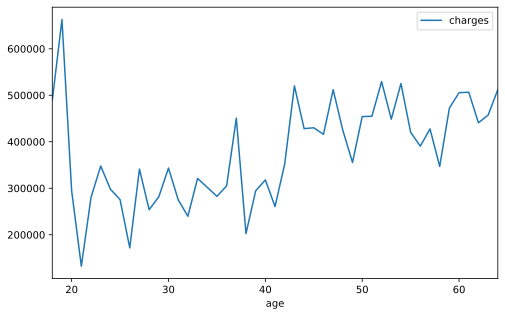

In [118]:
value_data = data[[x for x in data.columns if 'charges' in x] + ['age']]
value_data.groupby('age').sum().plot()

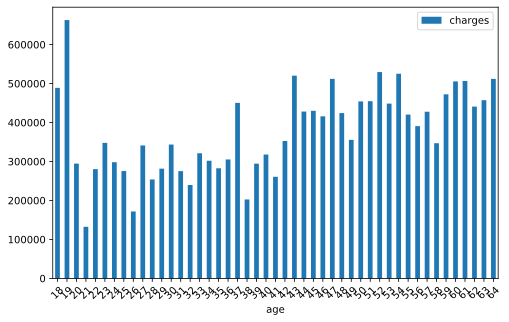

In [119]:
value_data.groupby('age').sum().plot(kind='bar', rot=45)

# Seaborn

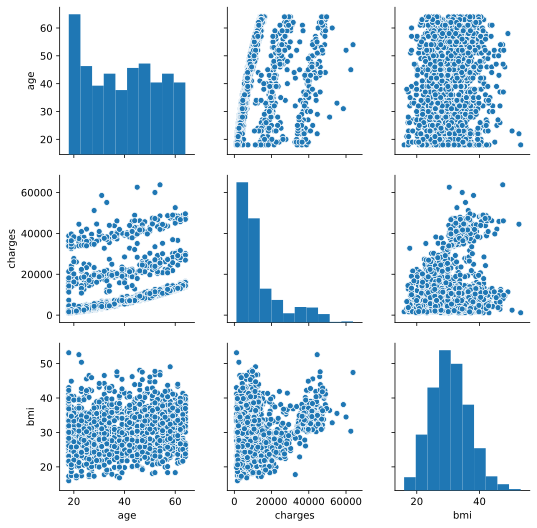

In [123]:
cols = ['age', 'charges','bmi']
sns_plot = sns.pairplot(data[cols])
sns_plot.savefig('pairplot.png')

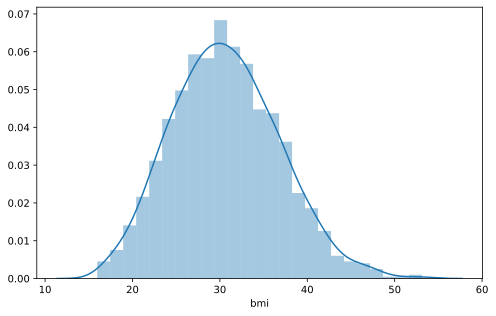

In [125]:
sns.distplot(data.bmi)

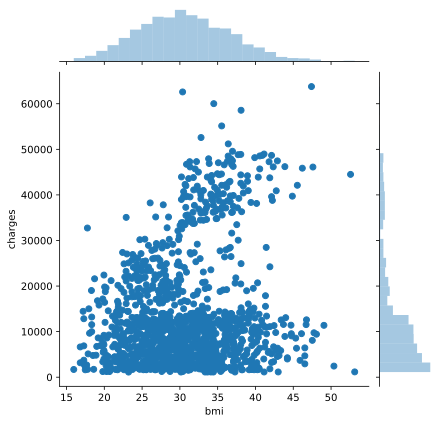

In [131]:
sns.jointplot(data.bmi,data.charges)

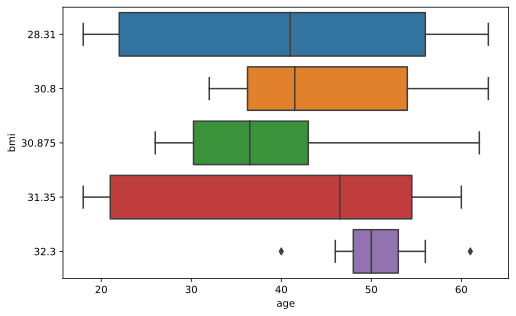

In [133]:
top = data.bmi.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="bmi", x="age", data=data[data.bmi.isin(top)], orient="h")

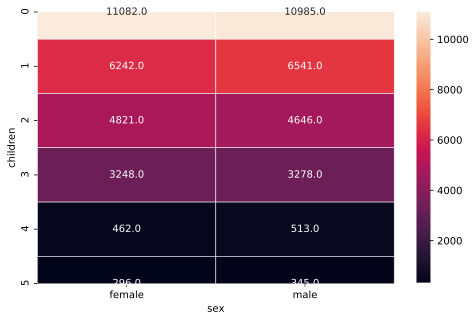

In [135]:
platform = data.pivot_table(
                        index='children', 
                        columns='sex', 
                        values='age', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform, annot=True, fmt=".1f", linewidths=.5)

# Plotly

In [204]:
pip install cufflinks plotly

Note: you may need to restart the kernel to use updated packages.


In [219]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [222]:
data = []
for Region in data.region.unique():
    data.append(
        go.Box(y=data[data.region==region].age, name=Region)
    )

# визуализируем данные
iplot(data, show_link = False)

AttributeError: 'list' object has no attribute 'region'

# Visual Data Analysis Example

In [225]:
data = pd.read_csv('insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [244]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

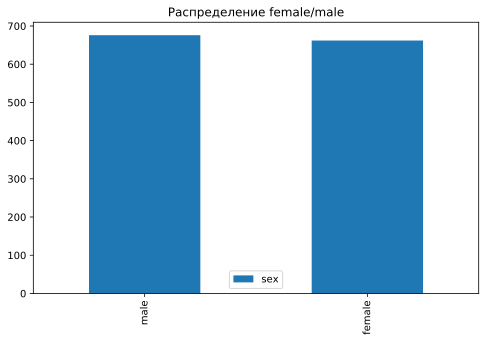

In [245]:
data['sex'].value_counts().plot(kind='bar', label='sex')
plt.legend()
plt.title('Распределение female/male');

In [246]:
corr_matrix = data.drop(['region', 'smoker', 'sex','age'], axis=1).corr()

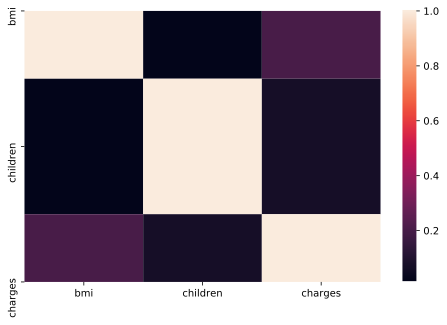

In [247]:
sns.heatmap(corr_matrix);

In [258]:
features = list(set(data.columns) - set(['age', 'bmi', 'children', 'charges']))
data[features].hist(figsize=(20,12));

ValueError: hist method requires numerical columns, nothing to plot.

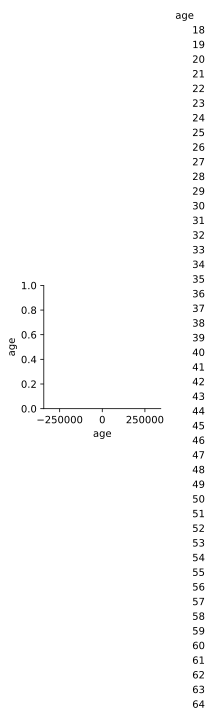

In [257]:
sns.pairplot(data[features + ['age']], hue='age');

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

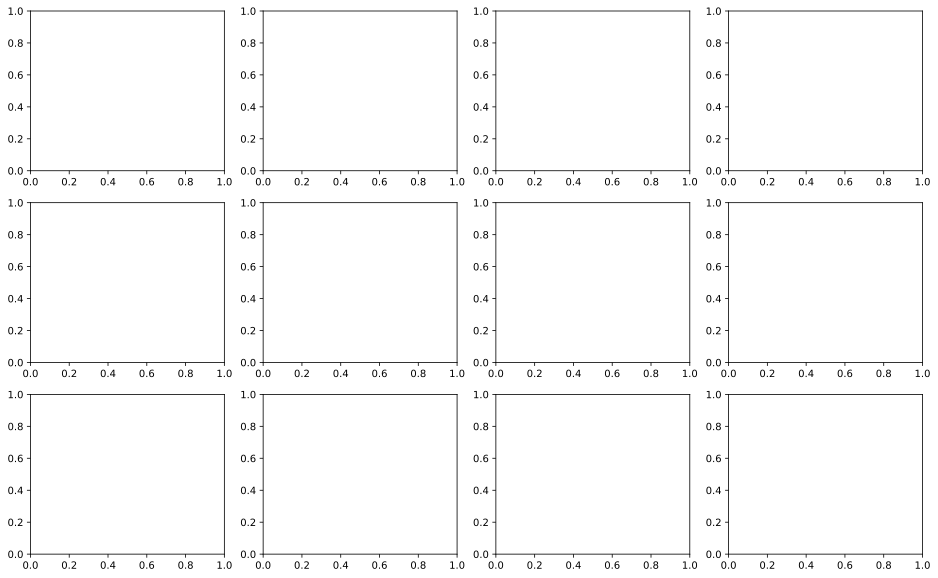

In [262]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(features):
    sns.boxplot(x='children', y=feat, data=data, ax=axes[idx / 4, idx % 4])
    axes[idx / 4, idx % 4].legend()
    axes[idx / 4, idx % 4].set_xlabel('children')
    axes[idx / 4, idx % 4].set_ylabel(feat);

# Peeping into n-dimensional space with t-SNE

In [263]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler